## Setup Database Client Libraries

Let us understand how to install Database Connector to connect to Postgres Database and run queries. We will also try to connect to database and submit a query as part of the validation.

* You can install Postgres Python connector using `python3 -m pip install psycopg2` or `python3 -m pip install psycopg2-binary`.
* Typically we need following information for our applications to connect to database.
  * Host Name or IP Address
  * Port Number
  * Database Name
  * Username
  * Password
* We need to ensure that right permissions are provided on the database to the user to perform required operations. 
* For CRUD operations, the user need to have `SELECT`, `INSERT`, `UPDATE` and `DELETE` permissions at the least.
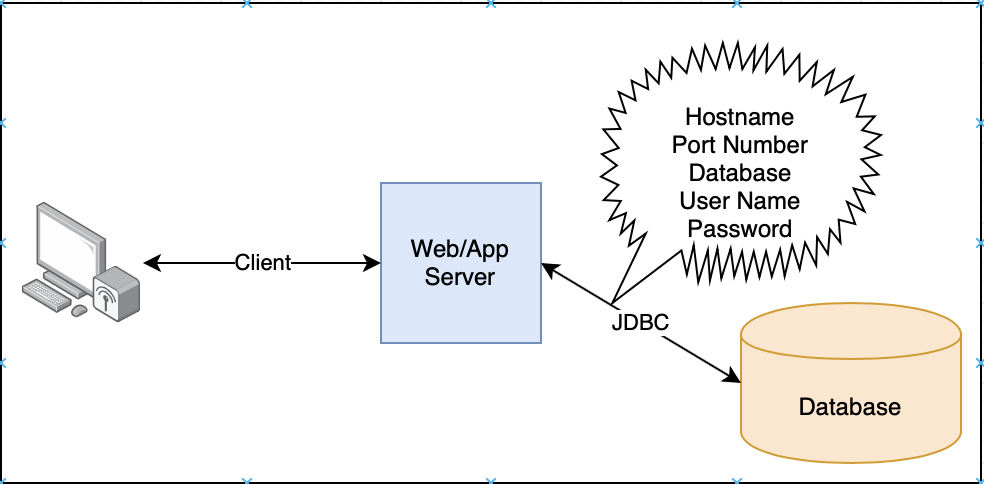

In [ ]:
!pip install psycopg2-binary

In [1]:
import psycopg2

In [2]:
psycopg2.connect?

Signature:
psycopg2.connect(
    dsn=None,
    connection_factory=None,
    cursor_factory=None,
    **kwargs,
)
Docstring:
Create a new database connection.

The connection parameters can be specified as a string:

    conn = psycopg2.connect("dbname=test user=postgres password=secret")

or using a set of keyword arguments:

    conn = psycopg2.connect(database="test", user="postgres", password="secret")

Or as a mix of both. The basic connection parameters are:

- *dbname*: the database name
- *database*: the database name (only as keyword argument)
- *user*: user name used to authenticate
- *password*: password used to authenticate
- *host*: database host address (defaults to UNIX socket if not provided)
- *port*: connection port number (defaults to 5432 if not provided)

Using the *connection_factory* parameter a different class or connections
factory can be specified. It should be a callable object taking a dsn
argument.

Using the *cursor_factory* parameter, a new default cursor 

In [3]:
connection = psycopg2.connect(
    host='pg.itversity.com',
    port='5432',
    database='sms_db',
    user='sms_user',
    password='itversity'
)
connection.close()

* Here is the function which will return the connection object.

In [4]:
import psycopg2

def get_connection(host, port, database, user, password):
    connection = None
    try:
        connection = psycopg2.connect(
            host=host,
            port=port,
            database=database,
            user=user,
            password=password
        )
    except Exception as e:
        raise(e)
    
    return connection

* Validating the get_connection function.

In [5]:
host = 'pg.itversity.com'
port = '5432'
database = 'sms_db'
user = 'sms_user'
password = 'itversity'

connection = get_connection(
    host=host,
    port=port,
    database=database,
    user=user,
    password=password
)

connection.close()

* The returned connection object exposes a function called as `cursor`.

```python
orders_cursor = connection.cursor()
```

In [6]:
host = 'pg.itversity.com'
port = '5432'
database = 'sms_db'
user = 'sms_user'
password = 'itversity'

connection = get_connection(
    host=host,
    port=port,
    database=database,
    user=user,
    password=password
)

orders_cursor = connection.cursor()

connection.close()

* Using `cursor`, we can execute queries using `execute` function. It takes a valid query as a string.

```python
query = """SELECT * FROM orders LIMIT 10"""
orders_cursor.execute(query)
```

```{note}
To validate we will use `information_schema.tables`. It is the table provided by Postgres to give the information of the tables and views that are available for us. You might end up seeing some system tables as output.
```

In [7]:
host = 'pg.itversity.com'
port = '5432'
database = 'sms_db'
user = 'sms_user'
password = 'itversity'

connection = get_connection(
    host=host,
    port=port,
    database=database,
    user=user,
    password=password
)

cursor = connection.cursor()
query = "SELECT * FROM information_schema.tables LIMIT 10"
cursor.execute(query)

for table_details in cursor:
    print(table_details)

connection.close()

('sms_db', 'public', 'users', 'BASE TABLE', None, None, None, None, None, 'YES', 'NO', None)
('sms_db', 'pg_catalog', 'pg_type', 'BASE TABLE', None, None, None, None, None, 'YES', 'NO', None)
('sms_db', 'pg_catalog', 'pg_foreign_table', 'BASE TABLE', None, None, None, None, None, 'YES', 'NO', None)
('sms_db', 'pg_catalog', 'pg_roles', 'VIEW', None, None, None, None, None, 'NO', 'NO', None)
('sms_db', 'pg_catalog', 'pg_settings', 'VIEW', None, None, None, None, None, 'NO', 'NO', None)
('sms_db', 'pg_catalog', 'pg_prepared_statements', 'VIEW', None, None, None, None, None, 'NO', 'NO', None)
('sms_db', 'pg_catalog', 'pg_stat_progress_vacuum', 'VIEW', None, None, None, None, None, 'NO', 'NO', None)
('sms_db', 'pg_catalog', 'pg_subscription', 'BASE TABLE', None, None, None, None, None, 'YES', 'NO', None)
('sms_db', 'pg_catalog', 'pg_attribute', 'BASE TABLE', None, None, None, None, None, 'YES', 'NO', None)
('sms_db', 'pg_catalog', 'pg_proc', 'BASE TABLE', None, None, None, None, None, 'YES'